In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from pyspark.sql import SparkSession

df_iris = load_iris(as_frame=True)

In [8]:
import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [5]:
pd_df_iris = pd.DataFrame(df_iris.data, columns = df_iris.feature_names)
pd_df_iris['target'] = pd.Series(df_iris.target)

In [9]:
conf = SparkConf().set("spark.ui.port", "4050")

# creamos el contexto y la sesión
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/31 15:28:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [10]:
spark_df_iris = spark.createDataFrame(pd_df_iris)
spark_df_iris = spark_df_iris.drop("target")

In [11]:
spark_df_iris.take(4)

[Row(sepal length (cm)=5.1, sepal width (cm)=3.5, petal length (cm)=1.4, petal width (cm)=0.2),
 Row(sepal length (cm)=4.9, sepal width (cm)=3.0, petal length (cm)=1.4, petal width (cm)=0.2),
 Row(sepal length (cm)=4.7, sepal width (cm)=3.2, petal length (cm)=1.3, petal width (cm)=0.2),
 Row(sepal length (cm)=4.6, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.2)]

In [16]:
type(spark_df_iris)

pyspark.sql.dataframe.DataFrame

In [12]:
from pyspark.ml.feature import VectorAssembler
assemble=VectorAssembler(inputCols=[
'sepal length (cm)',
'sepal width (cm)',
'petal length (cm)',
'petal width (cm)'],outputCol = 'iris_features')

assembled_data=assemble.transform(spark_df_iris)

In [13]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_scores=[]
evaluator = ClusteringEvaluator(featuresCol='iris_features', \
metricName='silhouette', distanceMeasure='squaredEuclidean')

for K in range(2,11):

    KMeans_=KMeans(featuresCol='iris_features', k=K)

    KMeans_fit=KMeans_.fit(assembled_data)

    KMeans_transform=KMeans_fit.transform(assembled_data) 

    evaluation_score=evaluator.evaluate(KMeans_transform)

    silhouette_scores.append(evaluation_score)

Text(0, 0.5, 'Silhouette Score')

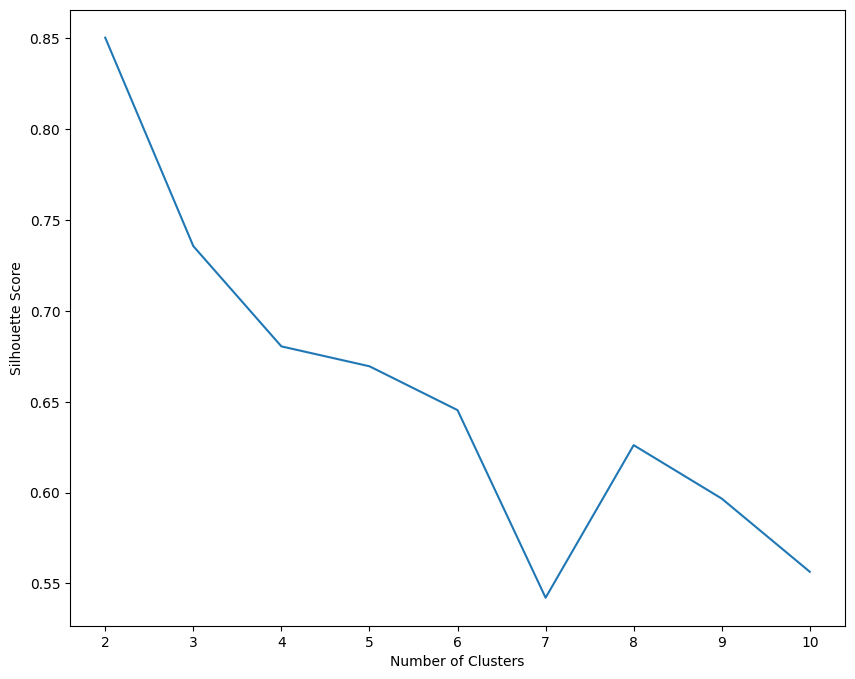

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,11),silhouette_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')